<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/(colab)canhealth_baseCNN_128v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 111 (delta 8), reused 8 (delta 4), pack-reused 85 (from 1)
Receiving objects: 100% (111/111), 212.75 MiB | 14.76 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (15/15), done.


In [2]:
# importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from time import perf_counter
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
import cv2
import numpy as np

In [3]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/train/
   creating: /content/cannabis-health-diagnosis/data/valid/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
   creating: /content/cannabis-health-diagnosis/data/test/Botrytis/
   creating: /content/cannabis-health-diagnosis/data/test/Dehydration/
   creating: /content/cannabis-health-diagnosis/data/test/Healthy/
   creating: /content/cannabis-health-diagnosis/data/test/Leaf Miners/
   creating: /content/cannabis-health-diagnosis/data/test/Nitrogen Deficiency/
   creating: /content/cannabis-health-diagnosis/data/test/Nutrient Burn/
   creating: /content/cannabis-health-diagnosis/data/test/Overwatering/
   creating: /content/cannabis-health-diagnosis/data/test/PH Fluctuation/
   creating: /content/cannabis-health-diagnosis/data/test/Phosphorus Deficiency/
   creating: /content/cannabis-health-diagnos

In [4]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [33]:
# Defining the paths to the data folders
train_dir = '/content/cannabis-health-diagnosis/data/train'
test_dir = '/content/cannabis-health-diagnosis/data/test'
valid_dir = '/content/cannabis-health-diagnosis/data/valid'

In [34]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# Load the train data
train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(128, 128), # Adjust to your image size
                                         class_mode='categorical')

# Load the validation data
valid_data = datagen.flow_from_directory(valid_dir,
                                         target_size=(128, 128),
                                         class_mode='categorical')

# Load the test data
test_data = datagen.flow_from_directory(test_dir,
                                        target_size=(128, 128),
                                        class_mode='categorical',
                                        shuffle=False)  # No need to shuffle test data

Found 1300 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Found 26 images belonging to 13 classes.


In [36]:
from keras.layers import Input, BatchNormalization, Dropout

In [57]:
model = Sequential([
    Input(shape=(128,128,3)),

    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(axis=1),
    Dropout(0.25),

    Flatten(),
    Dense(units=16,activation='relu'),
    Dense(units=13,activation='softmax')
])

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 16)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │       1,048,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             221 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,049,517 (4.00 MB)

 Trainable params: 1,049,389 (4.00 MB)

 Non-trainable params: 128 (512.00 B)

In [60]:
from tensorflow.keras.optimizers import Adam

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"],
              )

In [62]:
import keras

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
epochs = 100
checkpoint_filepath = '/content/cannabis-health-diagnosis/models/checkpoint_128v3.model.keras'

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

accuracy_metrics = model.fit(
    x=train_data,
    epochs=epochs,
    validation_data=valid_data,
    batch_size=20,
    callbacks=[early_stop, model_checkpoint_callback])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.0639 - loss: 2.6781 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0843 - loss: 2.5649 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0909 - loss: 2.5650 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.0747 - loss: 2.5650 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.0656 - loss: 2.5650 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0537 - loss: 2.5650 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0783 - loss: 2.5650 - val_accuracy: 0.0769 - val_loss: 2.5649
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.0831 - loss: 2.5650 - val_accuracy: 

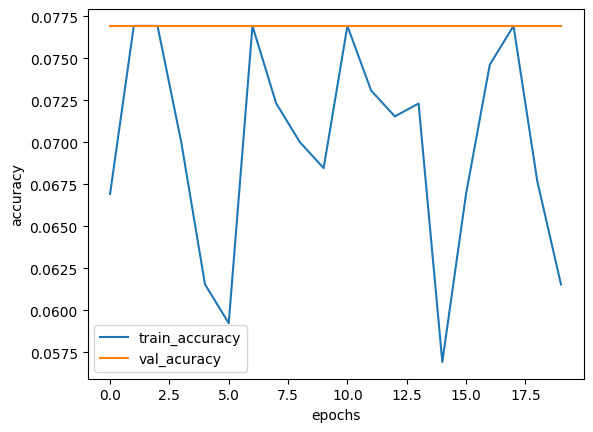

In [65]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [66]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 100th epoch the validation accuracy has reached 0.0769


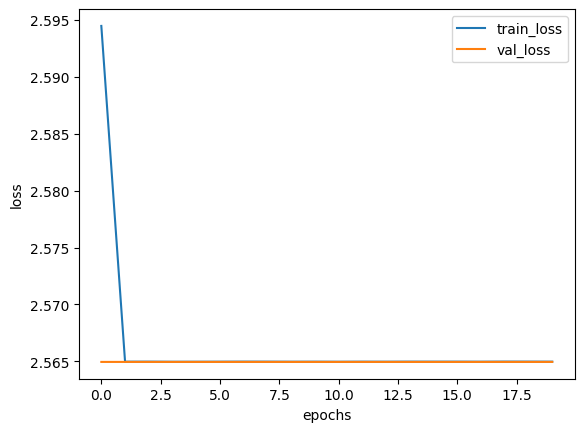

In [67]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [68]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 100th epoch the validation loss has decreased to 2.5649


In [69]:
model.save('models/baseCNN_reluAdam_128v3.h5')

In [70]:
model.save('models/baseCNN_reluAdam_128v3.keras')

In [71]:
valid_pred1 = model.predict(valid_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [72]:
valid_pred1.shape

(260, 13)

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
valid_pred_labels1 = valid_pred1.argmax(axis=1)

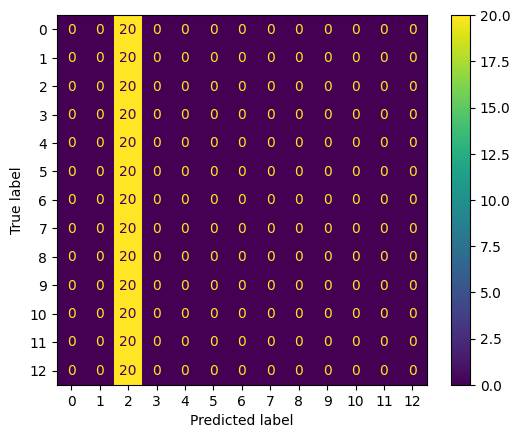

In [75]:
ConfusionMatrixDisplay(confusion_matrix(valid_data.labels, valid_pred_labels1)).plot()

In [76]:
!zip -r /content/modelsv3.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/baseCNN_reluAdam_128v3.keras (deflated 14%)
  adding: content/models/baseCNN_reluAdam_128.keras (deflated 8%)
  adding: content/models/baseCNN_reluAdam_128v2.h5 (deflated 9%)
  adding: content/models/baseCNN_reluAdam_128v3.h5 (deflated 14%)
  adding: content/models/baseCNN_reluAdam_128.h5 (deflated 8%)
  adding: content/models/baseCNN_reluAdam_128v2.keras (deflated 9%)


In [77]:
from google.colab import files
files.download('/content/modelsv3.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>